# Value Iteration 

In [4]:
import numpy as np
import random
import time

### Define States
states = []
for i in range(3):
    for j in range(4):
        states.append((i+1, j+1))

### Define Rewards
rewards = {}
for state in states:
    # Green Terminal State
    if state == (1,4):
        rewards[state] = 1
    # Red Terminal State
    elif state == (2, 4):
        rewards[state] = -1
    # For all other States
    else:
        rewards[state] = 0
    
### Define Actions
# U = Up, D = Down, L = Left, R = Right
actions = {             
    (1, 1): ["D", "R"],
    (1, 2): ["L", "R"],
    (1, 3): ["L", "R", "D"],
    (2, 1): ["U", "D"],             
    (2, 2): ["U", "D", "L", "R"],
    (2, 3): ["U", "R", "D"],
    (3, 1): ["U", "R"],
    (3, 2): ["L", "R"],
    (3, 3): ["L", "U", "R"],
    (3, 4): ["U", "L"]
}

# Function that returns the next state, given current state and action
def getNextState(a: str, s: tuple) -> tuple:
    if a == "U":
        next_state = (s[0] - 1, s[1])
        if next_state == (2, 2):
            next_state = (s[0], s[1])

    if a == "D":
        next_state = (s[0] + 1, s[1])
        if next_state == (2, 2):
            next_state = (s[0], s[1])    

    if a == "L":
        next_state = (s[0], s[1] - 1)
        if next_state == (2, 2):
            next_state = (s[0], s[1])

    if a == "R":
        next_state = (s[0], s[1] + 1)
        if next_state == (2, 2):
            next_state = (s[0], s[1])
    
    return next_state


# Encapsulation enables analysis for each hyperparam
def valueIteration(GAMMA = 0.9, THETA = 0.005, EPSILON = 0.1, VERBOSE = False) -> list:
    start_time = time.time()
    ### Define initial Policy
    policy = {}
    for state in actions.keys():
        policy[state] = np.random.choice(actions[state])

    # 1st Step: Initialize all V(s) arbitrary
    V = {}
    for s in states:
        if s == (1, 4):
            V[s] = 1
        elif s == (2, 4):
            V[s] = -1
        else:
            V[s] = 0

    ### Value Iteration Hyperparams ###
    GAMMA = GAMMA
    THETA = THETA
    # Set EPSILON = 0, if Agent should act deterministic
    EPSILON = EPSILON   

    # For Plotting
    delta_records = []

    # Value Iteration
    numb_of_iteration = 0
    while True:
        delta = 0
        for s in states:
            if s in policy:
                v_init = V[s]
                v_new = 0

                for a in actions[s]:
                    # Get Random Action (only relevant if EPSILON != 0)
                    a_rand = np.random.choice([action for action in actions[s] if action != a])

                    # If action is Up
                    if a == "U":
                        next_state = getNextState(a, s)
                        v = (1-EPSILON) * (rewards[next_state] + GAMMA*V[next_state]) + (EPSILON) * (rewards[getNextState(a_rand, s)] + GAMMA*V[getNextState (a_rand, s)])

                    # If action is Down
                    if a == "D":
                        next_state = getNextState(a, s)
                        v = (1-EPSILON) * (rewards[next_state] + GAMMA*V[next_state]) + (EPSILON) * (rewards[getNextState(a_rand, s)] + GAMMA*V[getNextState (a_rand, s)])   

                    # If action is Left
                    if a == "L":
                        next_state = getNextState(a, s)
                        v = (1-EPSILON) * (rewards[next_state] + GAMMA*V[next_state]) + (EPSILON) * (rewards[getNextState(a_rand, s)] + GAMMA*V[getNextState (a_rand, s)])   

                    # If action is Right
                    if a == "R":
                        next_state = getNextState(a, s)
                        v = (1-EPSILON) * (rewards[next_state] + GAMMA*V[next_state]) + (EPSILON) * (rewards[getNextState(a_rand, s)] + GAMMA*V[getNextState (a_rand, s)])   

                    # If new value of v(s) is better than the old value, i.e. v_init, then keep it
                    if v > v_new:
                        v_new = v
                        policy[s] = a
                    
                    # Print information about the variables
                    if VERBOSE:
                        print(f"s: {s}, s': {next_state}, a: {a}, v: {v}, v[s]: {V[s]}, V[s']: {V[next_state]}")
                    
                # Safe highest state value v_new in V dictionary
                V[s] = v_new
                # Calculate delta, i.e. difference between the old value and the new value
                delta = max(delta, np.abs(v_init - V[s]))

        delta_records.append(delta)                                 # Optional (for plotting)
        if delta < THETA:
            break
        numb_of_iteration += 1

    # Output result
    print(f"Hyperparams: GAMMA = {GAMMA}, THETA = {THETA}, EPSILON = {EPSILON}")
    print(f"Number of Iteration: {numb_of_iteration}")
    print(f"Optimal Policy: {policy}")
    print(f"State Value: {V}")
    # Time
    print("Value Iteration took {} seconds\n".format(time.time() - start_time))

    return delta_records


delta_records_eps_0_1 = valueIteration(GAMMA = 0.9, THETA = 0.005, EPSILON = 0.1, VERBOSE = False)
delta_records_eps_0_2 = valueIteration(GAMMA = 0.9, THETA = 0.005, EPSILON = 0.2, VERBOSE = False)
delta_records_eps_0_3 = valueIteration(GAMMA = 0.9, THETA = 0.005, EPSILON = 0.3, VERBOSE = False)


Hyperparams: GAMMA = 0.9, THETA = 0.005, EPSILON = 0.1
Number of Iteration: 273
Optimal Policy: {(1, 1): 'R', (1, 2): 'R', (1, 3): 'R', (2, 1): 'U', (2, 2): 'U', (2, 3): 'U', (3, 1): 'U', (3, 2): 'R', (3, 3): 'U', (3, 4): 'L'}
State Value: {(1, 1): 1.436172071883935, (1, 2): 1.6333929454997655, (1, 3): 1.857005365094979, (1, 4): 1, (2, 1): 1.2636000765497275, (2, 2): 1.4367722927442856, (2, 3): 1.314174345726933, (2, 4): -1, (3, 1): 1.1168837731299721, (3, 2): 1.0383529724624205, (3, 3): 1.1579329875604336, (3, 4): 0.7479257199239513}

Value Iteration took 0.14760422706604004 seconds

Hyperparams: GAMMA = 0.9, THETA = 0.005, EPSILON = 0.2
Number of Iteration: 4747
Optimal Policy: {(1, 1): 'R', (1, 2): 'R', (1, 3): 'R', (2, 1): 'U', (2, 2): 'U', (2, 3): 'U', (3, 1): 'U', (3, 2): 'R', (3, 3): 'U', (3, 4): 'L'}
State Value: {(1, 1): 1.2966888210878285, (1, 2): 1.5225607620189225, (1, 3): 1.7898418415122694, (1, 4): 1, (2, 1): 1.1106659058217292, (2, 2): 1.2792872290969892, (2, 3): 1.49787

# Plot Delta over time 📉

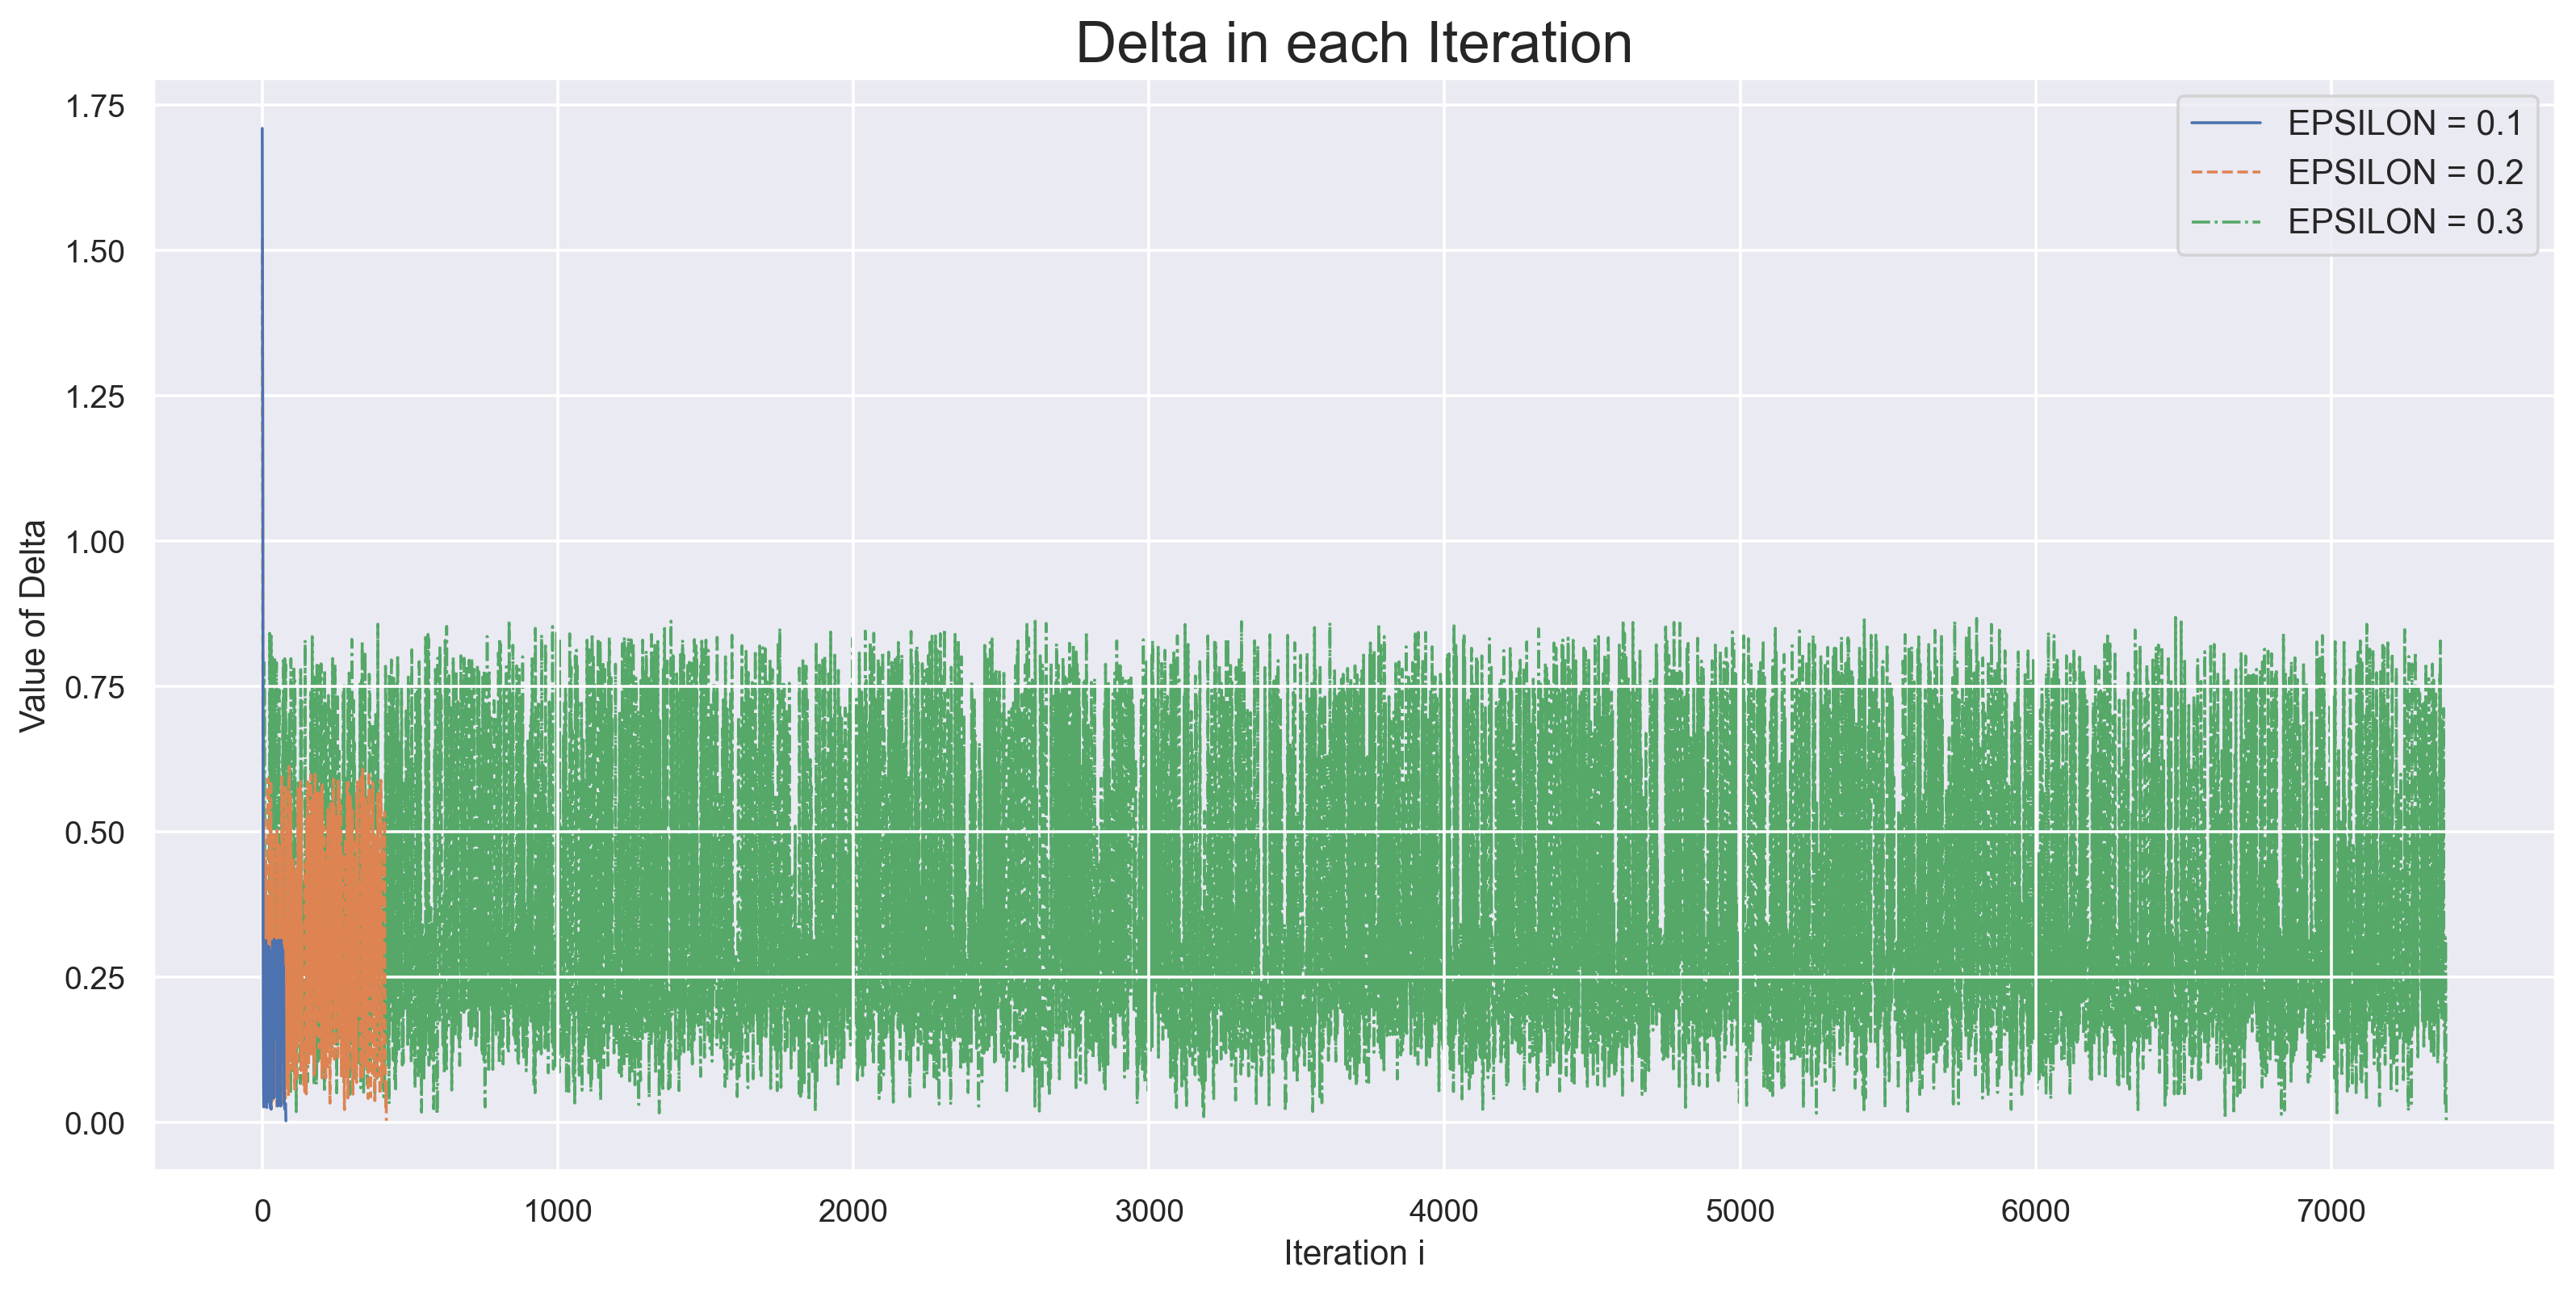

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(15, 7), dpi=256)
plt.plot(delta_records_eps_0_1, linewidth=1, zorder=10)
plt.plot(delta_records_eps_0_2, linewidth=1, linestyle="--", zorder=5)
plt.plot(delta_records_eps_0_3, linewidth=1, linestyle="-.", zorder=0)
plt.legend(["EPSILON = 0.1", "EPSILON = 0.2", "EPSILON = 0.3"], fontsize="medium")
plt.xlabel("Iteration i")
plt.ylabel("Value of Delta")
plt.title("Delta in each Iteration", fontsize=20)
plt.show()

# print(delta_records)

# Plot Delta over time in terms of GAMMA 📉

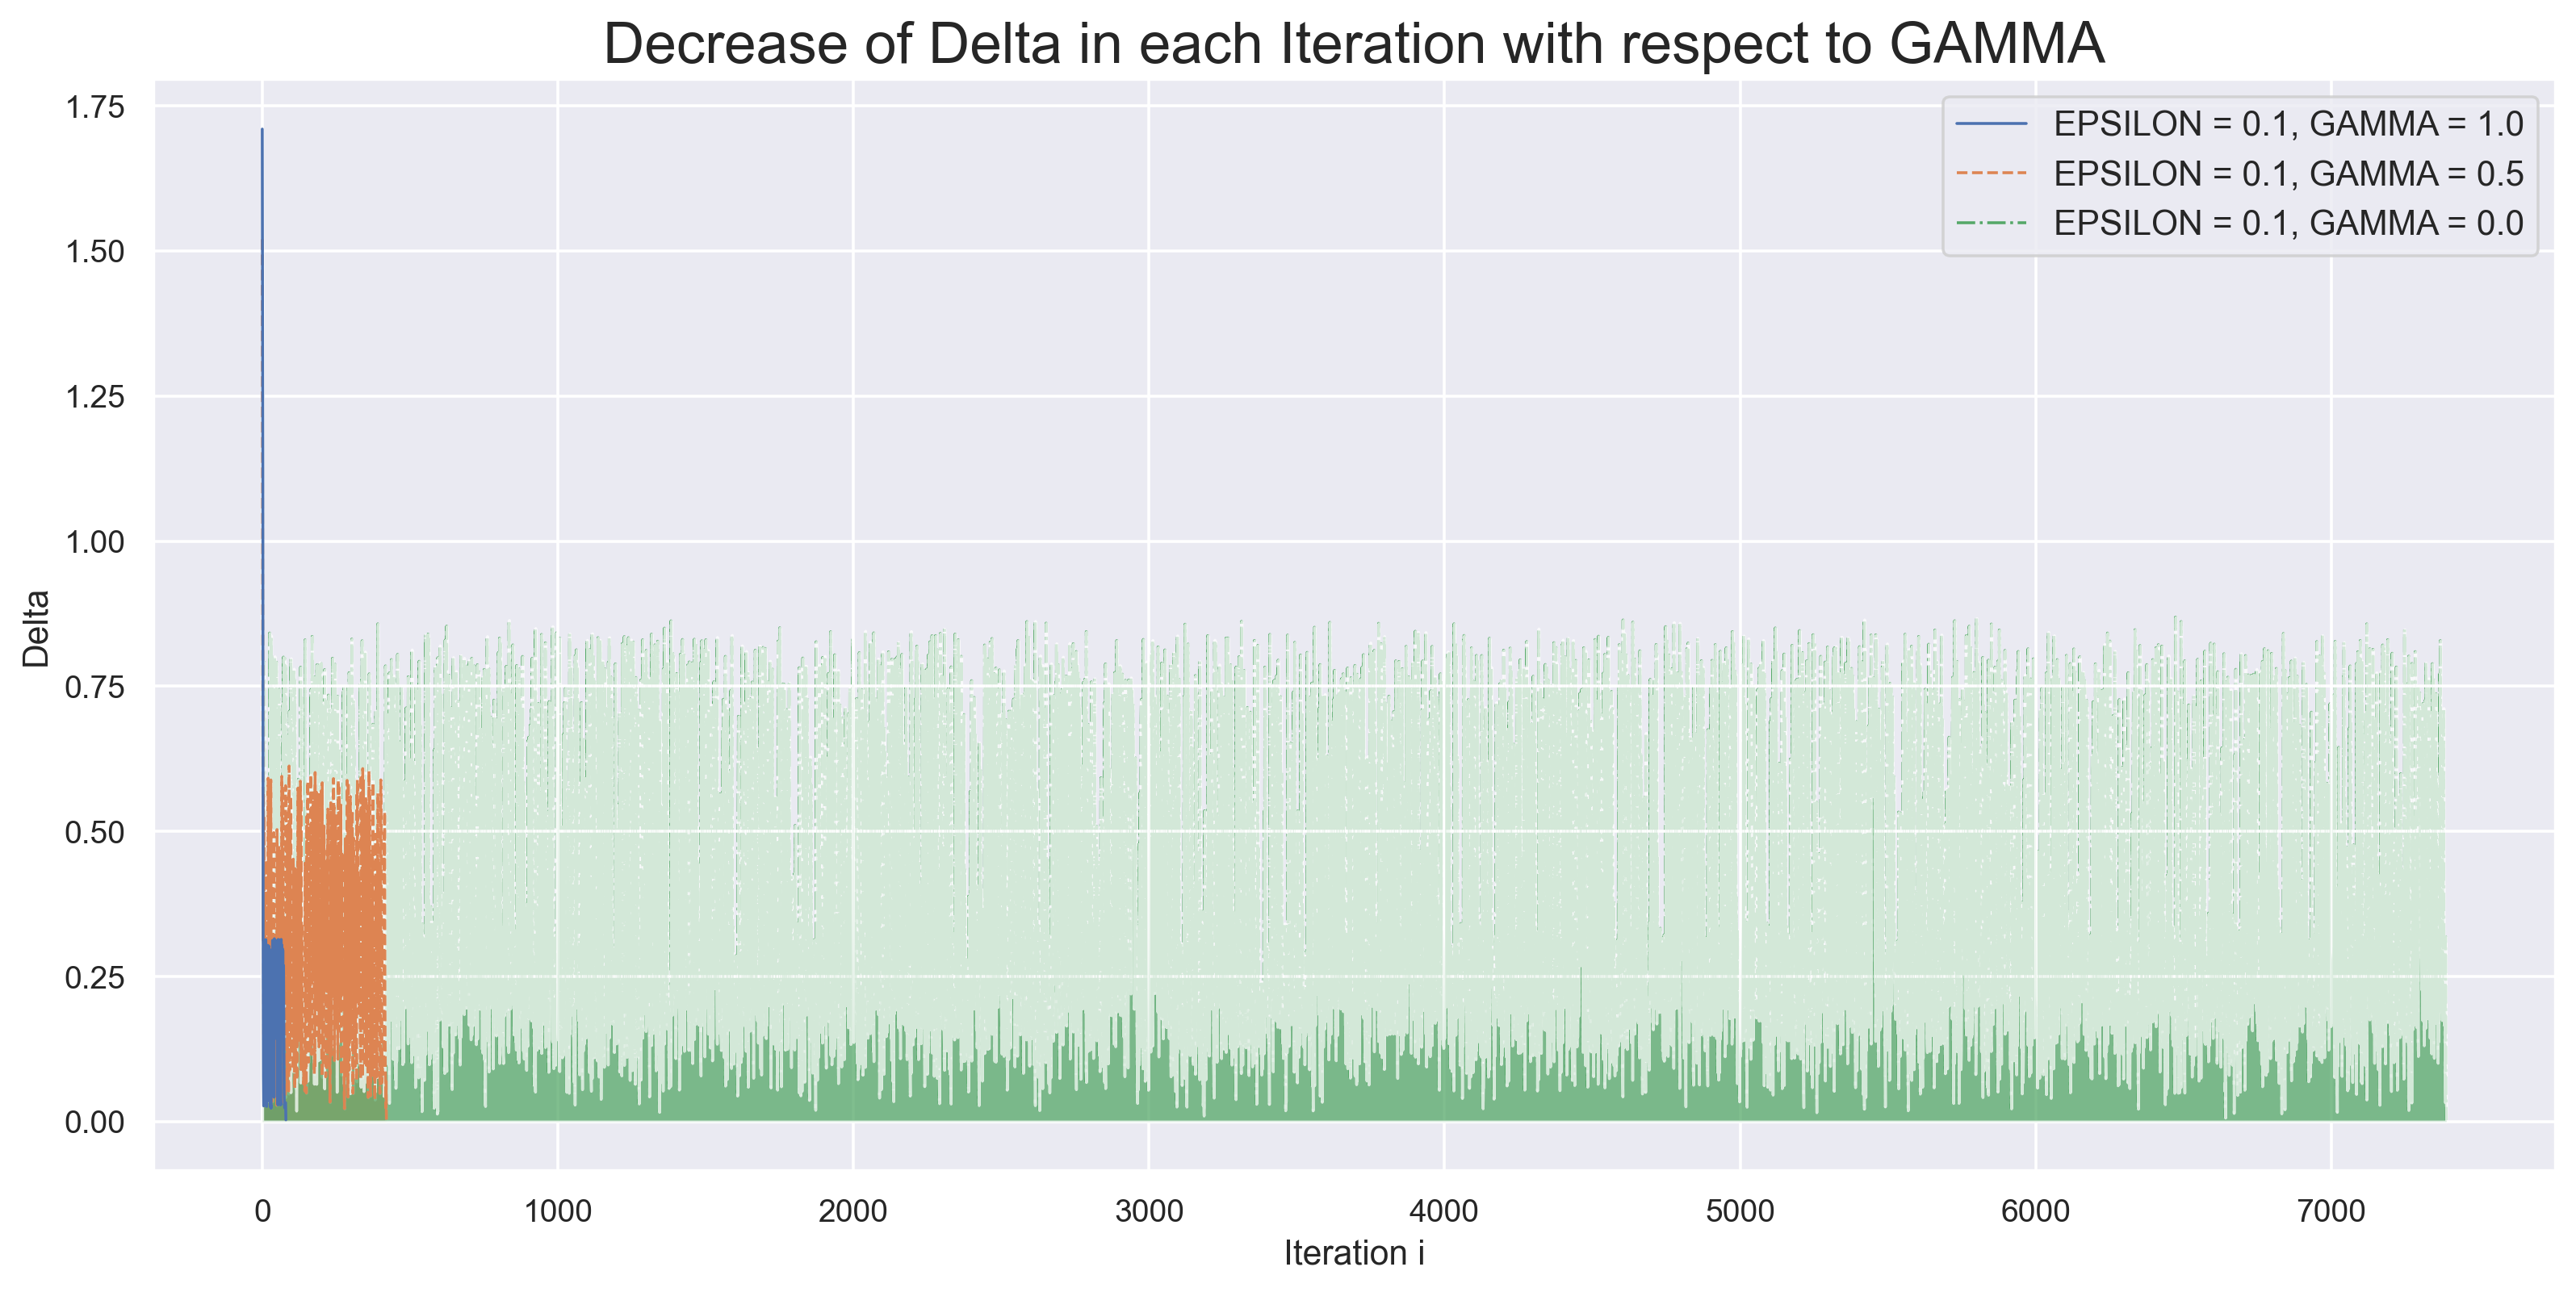

In [3]:
plt.figure(figsize=(15, 7), dpi=256)
plt.plot(delta_records_eps_0_1, linewidth=1, zorder=10)
plt.fill_between(np.arange(0, len(delta_records_eps_0_1)), delta_records_eps_0_1, alpha=0.75)
plt.plot(delta_records_eps_0_2, linewidth=1, linestyle="--", zorder=5)
plt.fill_between(np.arange(0, len(delta_records_eps_0_2)), delta_records_eps_0_2, alpha=0.75)
plt.plot(delta_records_eps_0_3, linewidth=1, linestyle="-.", zorder=0)
plt.fill_between(np.arange(0, len(delta_records_eps_0_3)), delta_records_eps_0_3, alpha=0.75)
plt.legend(["EPSILON = 0.1, GAMMA = 1.0", "EPSILON = 0.1, GAMMA = 0.5", "EPSILON = 0.1, GAMMA = 0.0"], fontsize="medium")
plt.xlabel("Iteration i")
plt.ylabel("Delta")
plt.title("Decrease of Delta in each Iteration with respect to GAMMA", fontsize=20)
plt.show()
